<a href="https://colab.research.google.com/github/mbahmujono/crewAI/blob/main/ic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import requests
from transformers import Seq2SeqTrainer ,Seq2SeqTrainingArguments
from transformers import ViTImageProcessor, ViTForImageClassification, VisionEncoderDecoderModel
from transformers import AutoTokenizer ,  GPT2Config , default_data_collator, AutoModel
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm
import multiprocessing as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Predicted class: Egyptian cat


In [4]:
class config :
    ENCODER = "google/vit-base-patch16-224"
    DECODER = "ECOFRI/CXR-LLAVA-v2"
    TRAIN_BATCH_SIZE = 2

    LR = 5e-5
    SEED = 42
    MAX_LEN = 71
    SUMMARY_LEN = 20
    WEIGHT_DECAY = 0.01
    MEAN = (0.485, 0.456, 0.406)
    STD = (0.229, 0.224, 0.225)
    TRAIN_PCT = 0.95
    NUM_WORKERS = mp.cpu_count()
    EPOCHS = 3
    IMG_SIZE = (224,224)
    LABEL_MASK = -100
    TOP_K = 1000
    TOP_P = 0.95



In [5]:
feature_extractor = ViTImageProcessor.from_pretrained(config.ENCODER)
tokenizer = AutoTokenizer.from_pretrained(config.DECODER)
tokenizer.pad_token = tokenizer.unk_token

In [2]:
model = AutoModel.from_pretrained("ECOFRI/CXR-LLAVA-v2", trust_remote_code=True)
model = model.to("cuda")

NameError: name 'AutoModel' is not defined

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'<|endoftext|>a black and white photo of a person holding a white and red fire hydrant <|endoftext|>'

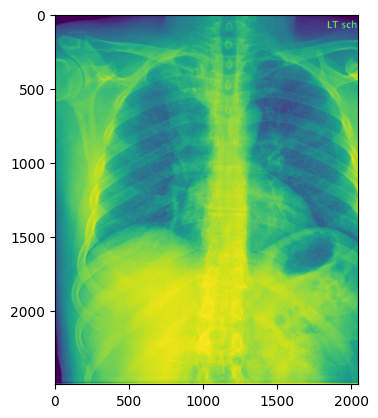

In [28]:
i = '/content/1000_IM-0003-1001.dcm.png'
img = Image.open(i).convert('RGB')
x = plt.imread(i)
plt.imshow(x)

**# General Report**

In [ ]:
response = model.write_radiologic_report(img)
response

Differential Diagnosis

In [ ]:
response = model.write_differential_diagnosis(img)
response